In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("D:/machine learning casestudies/IBM-HR-Employee-attrition-master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The data consists of levels for some features, The levels are as mentioned below:

Education                      1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction        1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement                 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction                1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating              1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction       1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance                1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In this data we can observe the target variable is attrition and the remaining are features

# Data Exploration
we need to perform data exploration for better understanding of data, we can perform visualization using matplotlib and seaborn

In [3]:
#checking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

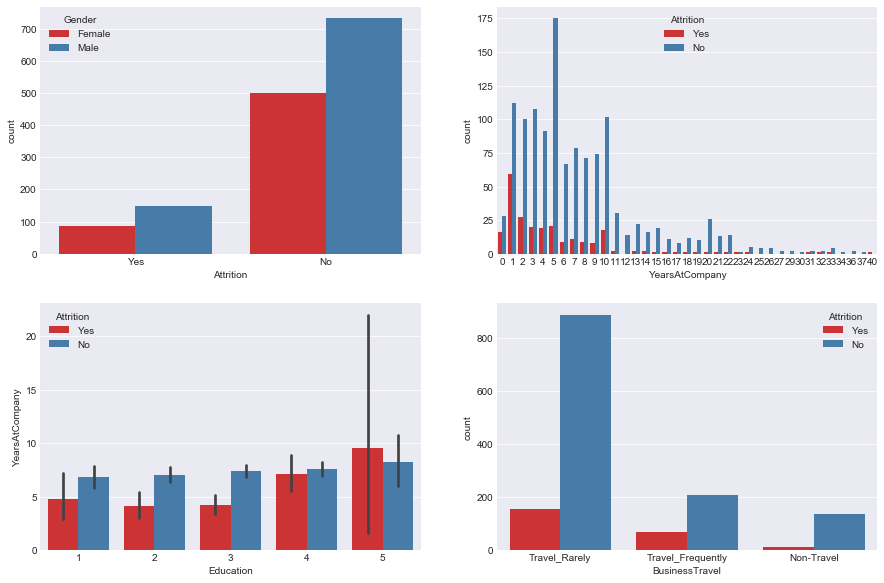

In [4]:
#what are the factors effecting the employees to leave the organization
sns.set_style('darkgrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize= (15,10))
sns.countplot(data['Attrition'], hue= data['Gender'], palette= 'Set1', ax= ax1)
sns.countplot(data['YearsAtCompany'], hue= data['Attrition'], palette= 'Set1', ax= ax2)
sns.barplot(data['Education'], data['YearsAtCompany'], hue= data['Attrition'], palette= 'Set1' , ax= ax3)
sns.countplot(data['BusinessTravel'], hue= data['Attrition'], palette= 'Set1', ax= ax4)

#plot1: we can observe number of male employees are leaving more then female employees
#plot2: we can observe most of the employees leaving are below 10years
#plot3: employees with doctrate degree are leaving the company
#plot4: employees who travel rarely are leaving the company compared to travel frequently and donot travel

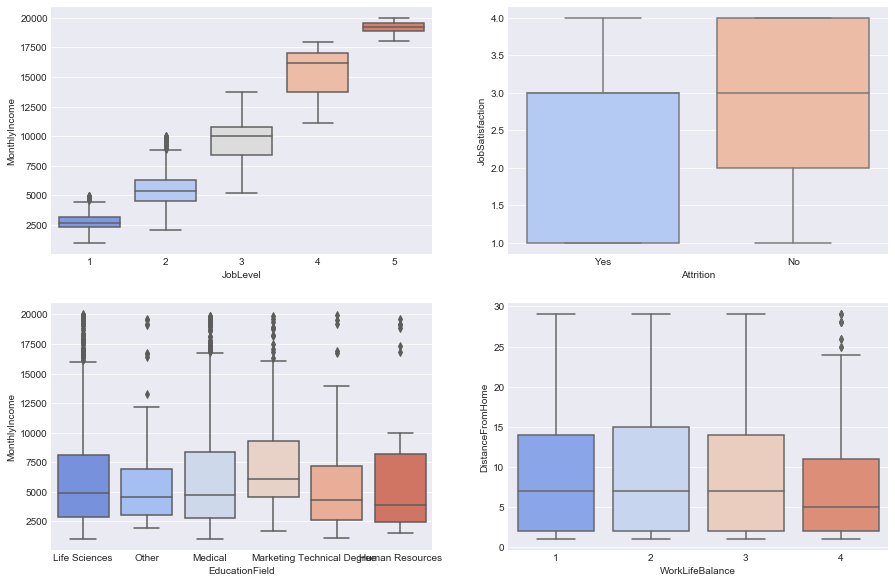

In [5]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize= (15,10))
sns.boxplot(data['JobLevel'],data['MonthlyIncome'], palette= 'coolwarm', ax= ax1)
sns.boxplot(data['Attrition'], data['JobSatisfaction'], palette='coolwarm', ax=ax2)
sns.boxplot(data['EducationField'], data['MonthlyIncome'], palette='coolwarm', ax=ax3)
sns.boxplot(data['WorkLifeBalance'], data['DistanceFromHome'], palette='coolwarm', ax=ax4)

# Observations from the plots:
# Plot 1: As an employees job level increases his average monthly income also increases.
# Plot 2: Employees with lower job satisfaction are leaving the company more.
# Plot 3: The average monthly salary of employees in marketing is higher than other employees.
# Plot 4: Employees staying closer to the work place have higher rating in work life balance.

# classification
#The main objective is to predict employees attrition because of what factors


In [6]:
numerical_data= data.select_dtypes(exclude= 'object')
categorical_data= data.select_dtypes(include= 'object')

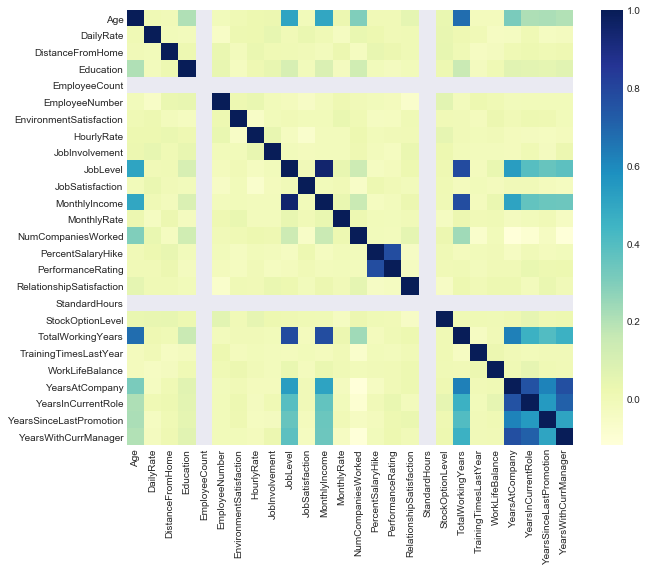

In [7]:
plt.figure(figsize= (10,8))
sns.heatmap(numerical_data.corr(), cmap= "YlGnBu")

The above correlation shows o as poor correlation and 1 as high correlation, our model should be trained on mainly poor correlated features for a better result, we can remove strongly correlated values from the data so that the model can train better

In [8]:
numerical_data= numerical_data.drop(['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                                     'YearsWithCurrManager', 'PercentSalaryHike', 'PerformanceRating'], axis=1)

Lets works on categorical variables, as our machine learning requires numeric data input, we will convert categorical to numeric format.

In [9]:
#attrition consists of Yes and No , we will change to 1 and 0
target_map= {'Yes': 1 , 'No':0 }
# use pandas apply method to numerically encode our attrition target variable
categorical_data['Attrition']= categorical_data["Attrition"].apply(lambda x: target_map[x])

C:\Users\praveen330\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
#now lets convert rest categorical data into numeric data
categorical_data= pd.get_dummies(categorical_data)

In [11]:
final_data= pd.concat([numerical_data, categorical_data], axis=1)

In [12]:
final_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


# Feature Engineering and Selection

In [13]:
final_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_

In [14]:
final_data= final_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [16]:
#split the data into train and test
x= final_data.drop('Attrition', axis=1) # features
y= final_data['Attrition'] #label

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.3, random_state= 0)

In [17]:
#lets call our classifier
rf_model= RandomForestClassifier()
log_model= LogisticRegression()
dt_model= DecisionTreeClassifier()
svc_model= SVC()

In [18]:
models= ['Random Forest Classifier', 'Logistic Regression Classifier', 'Decision Tree Classifier', 'Support Vector Classifier']
classifiers= [rf_model, log_model, dt_model, svc_model]
model_acc= []

In [19]:
#lets build our model using training data
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred= classifier.predict(x_test)
    acc= accuracy_score(y_test, pred)
    model_acc.append(acc)
    
for a,b in zip(models, model_acc):
    print('Accuracy of {}: {}'.format(a,b))

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Random Forest Classifier: 0.854875283446712
Accuracy of Logistic Regression Classifier: 0.8798185941043084
Accuracy of Decision Tree Classifier: 0.8140589569160998
Accuracy of Support Vector Classifier: 0.8412698412698413


# Cross Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.
In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. The goal of cross-validation is to estimate the expected level of
fit of a model to a data set that is independent of the data that were used to train the model.

In [20]:
from sklearn.model_selection import cross_val_score

for a,b in zip(models, classifiers):
    a= cross_val_score(estimator=b, X=x_train, y=y_train, cv=10)
    print('{} : {}'.format(a, a.mean()))

[0.84615385 0.84615385 0.85436893 0.83495146 0.84466019 0.87378641
 0.87378641 0.83333333 0.84313725 0.84313725] : 0.8493468933503199


C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

[0.84615385 0.86538462 0.88349515 0.83495146 0.86407767 0.89320388
 0.86407767 0.8627451  0.90196078 0.8627451 ] : 0.8678795267173338
[0.75       0.76923077 0.81553398 0.87378641 0.76699029 0.77669903
 0.78640777 0.80392157 0.84313725 0.79411765] : 0.7979824715547159


C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\svm\base

[0.83653846 0.83653846 0.83495146 0.83495146 0.83495146 0.83495146
 0.83495146 0.84313725 0.84313725 0.84313725] : 0.8377245969336202


In [21]:
# Let us try to perform some parameter tuning and see if we can better the accuracy of our best performing classifier
from sklearn.model_selection import GridSearchCV

In [22]:
penality= ['l1', 'l2']
c= [0.1, 1, 10, 100, 1000]
params= {'c':c, 'penality':penality}

In [23]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [24]:
grid_clf= GridSearchCV(estimator= log_model, param_grid=grid_values, scoring='accuracy',  cv=10)
grid_clf.fit(x_train, y_train)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
print('Best Parameters: ', grid_clf.best_params_)
print('Best Score: ', grid_clf.best_score_)

Best Parameters:  {'C': 10, 'penalty': 'l1'}
Best Score:  0.8775510204081632


In [26]:
grid_clf.fit(x_train, y_train)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
p =grid_clf.predict(x_test)

In [28]:
print(confusion_matrix(y_test,p))

[[363   8]
 [ 44  26]]


In [29]:
print(accuracy_score(y_test,p))

0.8820861678004536


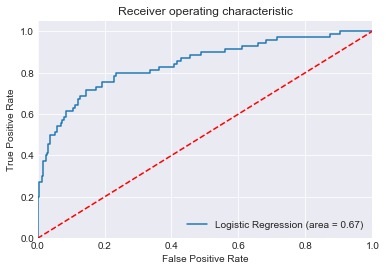

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, grid_clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, grid_clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic Regression is performing well consistently 

# Aritificial Neural Networks using Keras

In [31]:
#data normalization using standard scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(x_train)
X_test= sc.fit_transform(x_test)

C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\praveen330\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
final_data.shape

(1470, 47)

In [33]:
final_data= final_data.drop(['Gender_Female', 'MaritalStatus_Divorced'], axis=1)

In [34]:
final_data.shape

(1470, 45)

In [35]:
final_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Resear

In [36]:
# we will build our neuron network consisting of 2 hidden layers of 22 neurons each
#building ANN 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

classifier= Sequential()
classifier.add(Dense(units=22, kernel_initializer= 'normal', activation= 'linear', input_dim = 46))
classifier.add(Dropout(p= 0.1))
classifier.add(Dense(units = 22, kernel_initializer = 'normal', activation = 'relu'))
classifier.add(Dropout(p= 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

C:\Users\praveen330\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\praveen330\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\praveen330\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if sys.path[0] == '':


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
1029/1029 [==============================] - 0s - loss: 0.6010 - acc: 0.8309     
Epoch 2/100
1029/1029 [==============================] - 0s - loss: 0.3831 - acc: 0.8377     
Epoch 3/100
1029/1029 [==============================] - 0s - loss: 0.3474 - acc: 0.8581     
Epoch 4/100
1029/1029 [==============================] - 0s - loss: 0.3354 - acc: 0.8727     
Epoch 5/100
1029/1029 [==============================] - 0s - loss: 0.3310 - acc: 0.8766     
Epoch 6/100
1029/1029 [==============================] - 0s - loss: 0.3193 - acc: 0.8776     
Epoch 7/100
1029/1029 [==============================] - 0s - loss: 0.3135 - acc: 0.8912     
Epoch 8/100
1029/1029 [==============================] - 0s - loss: 0.3105 - acc: 0.8844     
Epoch 9/100
1029/1029 [==============================] - 0s - loss: 0.3040 - acc: 0.8902     
Epoch 10/100
1029/1029 [==============================] - 0s - loss: 0.2959 - acc

1029/1029 [==============================] - 0s - loss: 0.2038 - acc: 0.9096     
Epoch 84/100
1029/1029 [==============================] - 0s - loss: 0.1985 - acc: 0.9155     
Epoch 85/100
1029/1029 [==============================] - 0s - loss: 0.1977 - acc: 0.9135     
Epoch 86/100
1029/1029 [==============================] - 0s - loss: 0.2050 - acc: 0.9077     
Epoch 87/100
1029/1029 [==============================] - 0s - loss: 0.1988 - acc: 0.9135     
Epoch 88/100
1029/1029 [==============================] - 0s - loss: 0.1899 - acc: 0.9164     
Epoch 89/100
1029/1029 [==============================] - 0s - loss: 0.2079 - acc: 0.9067     
Epoch 90/100
1029/1029 [==============================] - 0s - loss: 0.1907 - acc: 0.9145     
Epoch 91/100
1029/1029 [==============================] - 0s - loss: 0.1918 - acc: 0.9125     
Epoch 92/100
1029/1029 [==============================] - 0s - loss: 0.2056 - acc: 0.9096     
Epoch 93/100
1029/1029 [==============================] - 0s - 

In [37]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [38]:
print(confusion_matrix(y_test, y_pred))

[[354  17]
 [ 41  29]]


In [39]:
print(accuracy_score(y_test, y_pred))

0.8684807256235828
